In [16]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [17]:
X_train = pd.read_csv('weather_data_train.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
X_test = pd.read_csv('weather_data_test.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
labels = pd.read_csv('weather_data_train_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
labels_test = pd.read_csv('weather_data_test_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)

print(X_train.shape)
print(X_test.shape)
print(labels.shape)
print(labels_test.shape)
X_train.head(3)

(3140, 16)
(1346, 16)
(3140, 2)
(1346, 2)


,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2006-09-20,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286
2006-09-21,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143
2006-09-22,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143


In [18]:
labels_test.isna().sum()

OBSERVED    0
U_mu        0
dtype: int64

In [19]:
labels.isna().sum()

OBSERVED    0
U_mu        0
dtype: int64

In [20]:
testing_data = pd.merge(X_test.reset_index(), labels_test.reset_index(),how='inner', on=None, left_on=None, right_on=None).drop_duplicates().set_index(['datetime'])
training_data = pd.merge(X_train.reset_index(), labels.reset_index(),how='inner', on=None, left_on=None, right_on=None).drop_duplicates().set_index(['datetime'])
training_data.head(3)


,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,OBSERVED,U_mu
datetime,,,,,,,,,,,,,,,,,,
2006-09-20,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286,0,88.625
2006-09-21,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143,1,82.000
2006-09-22,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143,1,86.000


In [21]:
training_data.dtypes

T_mu        float64
Po_mu       float64
P_mu        float64
Ff_mu       float64
Tn_mu       float64
Tx_mu       float64
VV_mu       float64
Td_mu       float64
T_var       float64
Po_var      float64
P_var       float64
Ff_var      float64
Tn_var      float64
Tx_var      float64
VV_var      float64
Td_var      float64
OBSERVED      int64
U_mu        float64
dtype: object

In [22]:
# Index:
# – “datetime" is the index, indicating the date in the format YYYY-MM-DD.
# • Numerical attributes:
# – “T" is the air temperature, in degrees Celsius, 2 meters above the earth’s. surface.
# – “Po" is the atmospheric pressure at weather station level, in millimeters of mercury.
# – “P" is the atmospheric pressure reduced to mean sea level, in millimeters of mercury.
# – “Ff" is the mean wind speed at a height of 10-12 meters above the earth’s surface, in meters per second.
# – “Tn" is the minimum air temperature, in degrees Celsius, over the past day.
# – “Tx" is the maximum air temperature, in degrees Celsius, over the past day.
# – “W" is the horizontal visibility, in km.
# – “Td" is the dewpoint temperature at a height of 2 meters above the earth’s surface, in degrees Celsius.
# – “U" is the relative humidity, in percentage, 2 meters above the earth’s surface.
# – “OBSERVED" is a categorical variable, where 0 (not dry) indicates that the amount of precipitation was
# more than 0.3 millimeters, and 1 (dry) indicates that there was little or no precipitation.

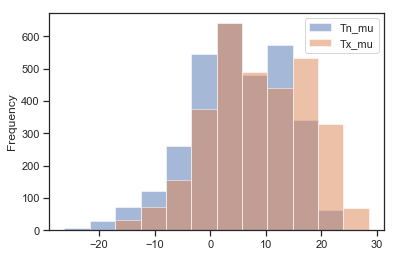

In [23]:
# Histograms: Plot the histograms of Tn mu and Tx mu on the same plot: is it what you expect? Plot also other
# histograms that might be interesting for you and your analysis.
Tn_Tx_train = training_data[['Tn_mu', 'Tx_mu']]
Tn_Tx_train.plot.hist(bins=12, alpha=0.5)

In [24]:
# Pair plots: Plot the pair plots for T mu, P mu, Td mu, Ff mu, VV mu, U mu. Plot also other pair plots that
# might be interesting for you and your analysis


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


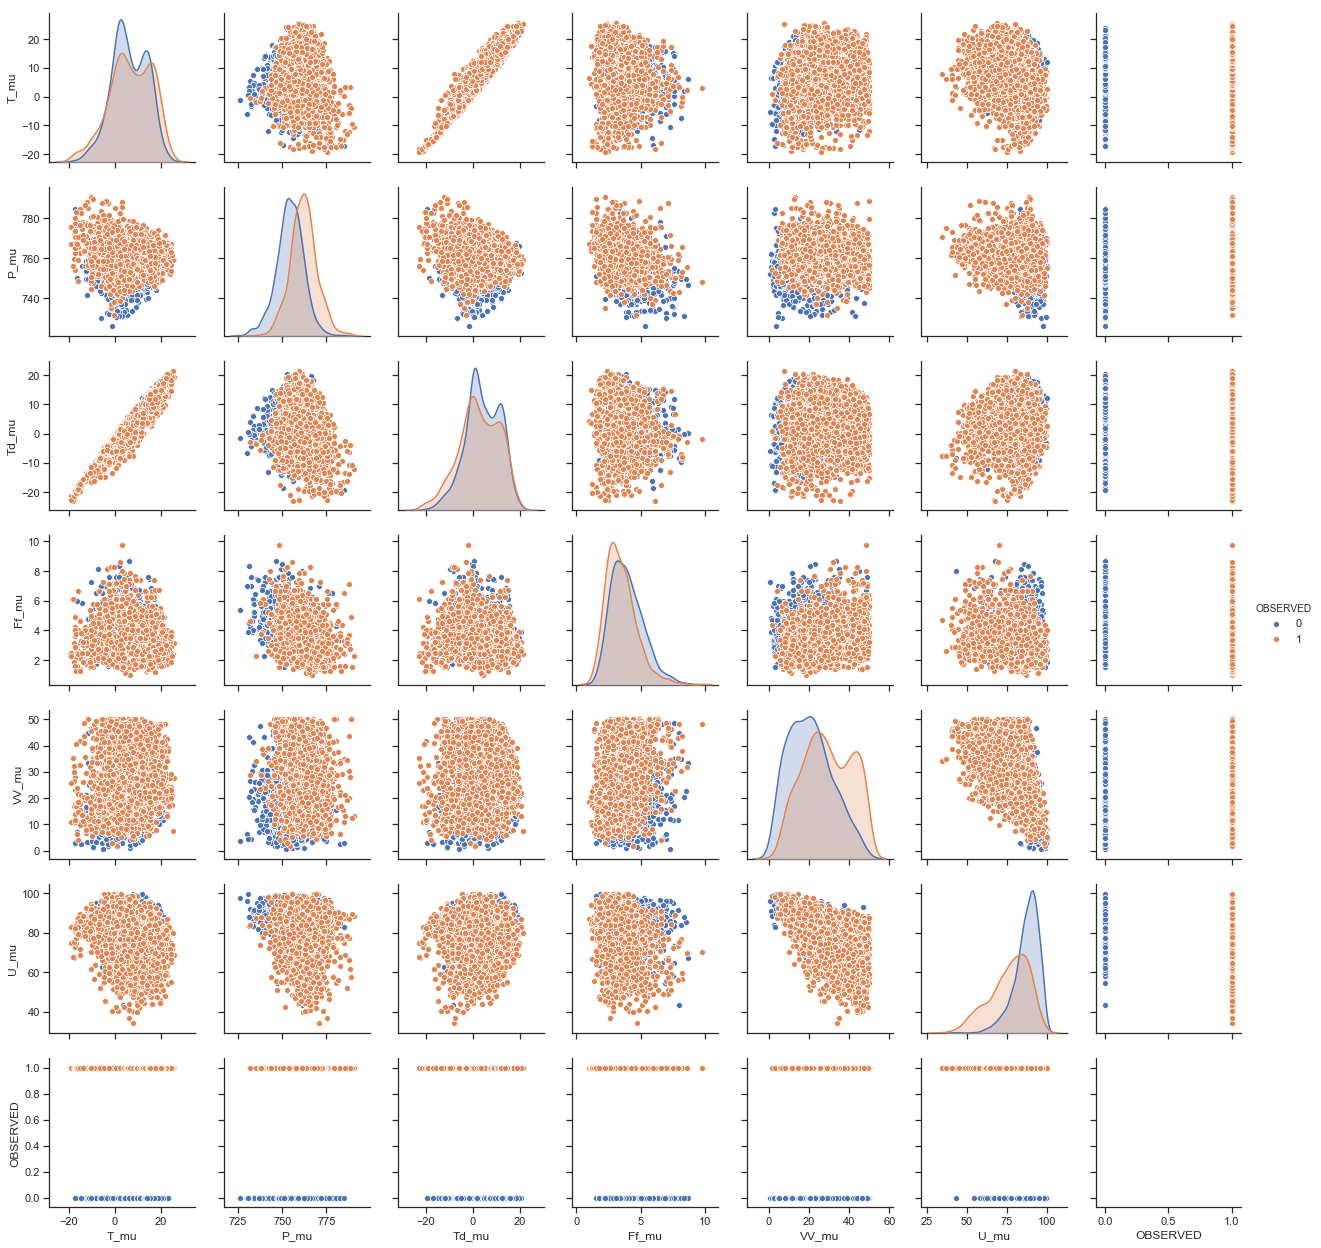

In [25]:
# "U_mu" is not in the dataset
# Ask Sam if I should divide thing by range first
data = training_data[["T_mu", "P_mu", "Td_mu", "Ff_mu", "VV_mu", "U_mu","OBSERVED" ]]
sns.pairplot(data, hue="OBSERVED")


In [26]:
mean_training = training_data[["T_mu", "Po_mu", "P_mu", "Ff_mu", "Tn_mu", "Tx_mu", "VV_mu", "U_mu"]]

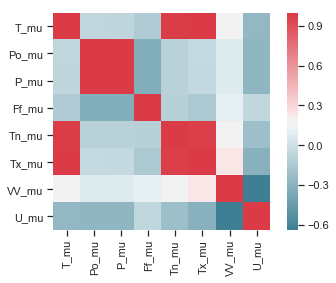

In [27]:
# correlation matrix of mean
sns.heatmap(mean_training.corr(), mask=np.zeros_like(mean_training.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

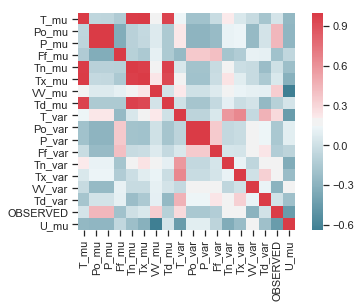

In [28]:
var_training = training_data[["T_var", "Po_var", "P_var", "Ff_var", "Tn_var", "Tx_var", "VV_var"]]
# correlation matrix of varriance
sns.heatmap(training_data.corr(), mask=np.zeros_like(training_data.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


7.965477165830059
0.44238557720347754
[4.45425103 3.51122614]
cumsum pca.explained_variance_ratio_ [0.24737958 0.44238558]


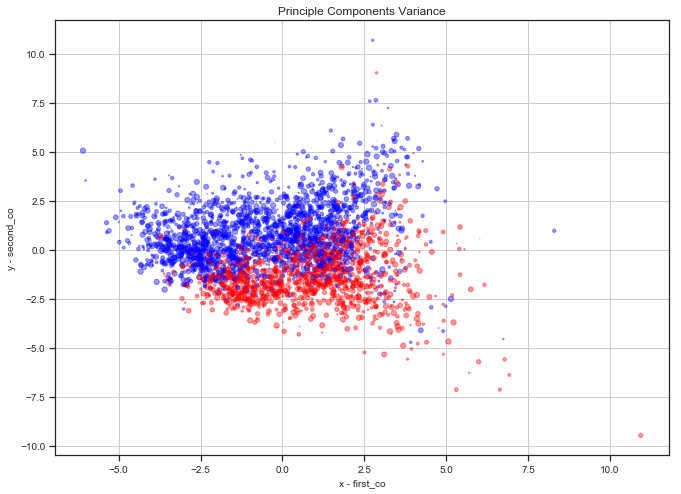

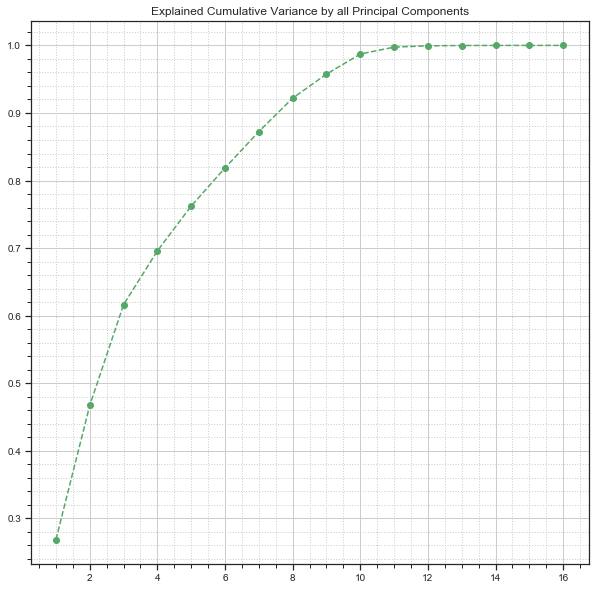

In [73]:
# TODO:
# PCA will give strange result => standardize 
# PCA: Prepare a PCA projection using the first 2 components
# print the cumulative explained variance of all
# 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

rng = np.random.RandomState(0)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(training_data))
principalDf = pd.DataFrame(data = principalComponents, columns = ["first_co", "second_co"])
print(np.sum(pca.explained_variance_))
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_)
print("cumsum pca.explained_variance_ratio_", np.cumsum(pca.explained_variance_ratio_))
n = principalDf.shape[0]
colors = rng.rand(n)
sizes = 30 * rng.rand(n)

    
plt.figure(figsize=(11,8))
plt.scatter(principalDf["first_co"], principalDf["second_co"], c=["blue" if training_data.iloc[i]["OBSERVED"] else "red" for i in range(training_data.shape[0])], s=sizes, alpha=0.4, cmap='viridis')
# plt.colorbar();
plt.title('Principle Components Variance')  
plt.xlabel('x - first_co')  
plt.ylabel('y - second_co')
# plt.legend()
plt.grid(True)
plt.show()

# 

def plot_expl_variance(pca_var):
    pca_var_total = sum(pca_var)
    pca_cum = np.cumsum(pca_var)
    pca_cum = [x / pca_var_total for x in pca_cum]

    f, ax = plt.subplots(figsize=(10,10))
    ax.plot(range(1, 1 + len(pca_cum)), pca_cum, '--go', label='PCA explained variance per component')
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle=':')
    plt.title('Explained Cumulative Variance by all Principal Components')
    plt.show()
    
pca = PCA(n_components=16)
principalComponents = pca.fit_transform((StandardScaler().fit_transform(X_train)))
principalDf = pd.DataFrame(data = principalComponents)
   
pca_var = principalDf.var().tolist()
# print(pca_var)
#print(pca_var)
#print(principalDf)
plot_expl_variance(pca_var)

In [30]:
# We can almost draw a line and there is very
principalComponents.shape

(3140, 2)

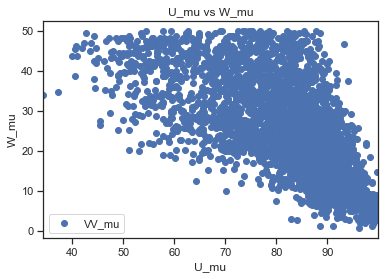

In [31]:
# Since U_mu and W_mu are negatively correlated 
# plot U_mu and W_mu
training_data.plot(x='U_mu', y='VV_mu', style='o')  
plt.title('U_mu vs W_mu')  
plt.xlabel('U_mu')  
plt.ylabel('W_mu')

plt.show()

In [32]:
# Do linear regression on the training data
# linear regression model basically finds the best value for the intercept and slope,
# which results in a line that best fits the data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
training_reg = regressor.fit(X_train, labels.U_mu)


print("Intercef",regressor.intercept_)

#Regression coefficient is a statistical measure of the average functional relationship between two or more variables.
#The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. 
print("Coef",regressor.coef_)

Intercef 120.18036379180246
Coef [-4.37863567e+00  9.58574486e-01 -9.86675980e-01 -2.07551005e-01
  2.78131793e-01 -3.37839112e-01 -6.27401941e-02  4.55441867e+00
  5.60519848e-02  1.59683856e-01 -1.54021900e-01 -2.64359894e-02
  4.41774361e-02 -8.67669196e-03  8.28122077e-04  4.66677141e-02]


In [33]:
pd.DataFrame(data = regressor.coef_.reshape(1,-1)
             , columns = X_train.columns.values)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
0,-4.378636,0.958574,-0.986676,-0.207551,0.278132,-0.337839,-0.06274,4.554419,0.056052,0.159684,-0.154022,-0.026436,0.044177,-0.008677,0.000828,0.046668


In [34]:
labels_pred = training_reg.predict(X_train)
train_predict_comparison = pd.DataFrame({'Actual': labels.U_mu, 'Predicted': labels_pred.flatten()})
training_error = mean_squared_error(labels.U_mu, labels_pred)

print("training error: ",training_error)


train_predict_comparison.head()


training error:  1.8507034589412745


,Actual,Predicted
datetime,,
2006-09-20,88.625,89.556014
2006-09-21,82.000,82.686893
2006-09-22,86.000,86.881184
2006-09-23,91.000,90.809713
2006-09-24,89.000,89.860755


In [35]:
regressor2 = LinearRegression()
testing_reg = regressor2.fit(X_test, labels_test.U_mu)
labels_test_pred = testing_reg.predict(X_test)
testing_error = mean_squared_error(labels_test.U_mu, labels_test_pred)
print("testing error: ",testing_error)

testing error:  2.124131296822182


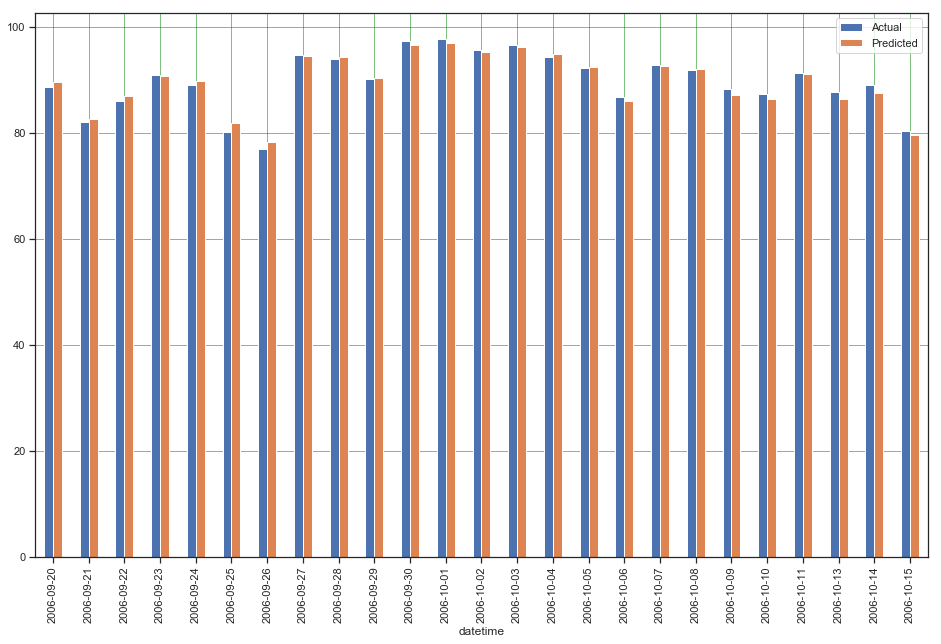

In [36]:
df1 = train_predict_comparison.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)


model = LinearRegression()
model.fit(x_poly, labels.U_mu)
y_poly_pred = model.predict(x_poly)
y_poly_pred.shape
poly_train_predict_comparison = pd.DataFrame({'Actual': labels.U_mu, 'Polynomial Predicted': y_poly_pred.flatten(), 'Linear Predicted': labels_pred.flatten()})
poly_training_error = mean_squared_error(labels.U_mu, y_poly_pred)
print("poly training error", poly_training_error)
poly_train_predict_comparison.head()

poly training error 0.2977680623159478


,Actual,Polynomial Predicted,Linear Predicted
datetime,,,
2006-09-20,88.625,88.596273,89.556014
2006-09-21,82.000,82.138059,82.686893
2006-09-22,86.000,86.078422,86.881184
2006-09-23,91.000,91.118766,90.809713
2006-09-24,89.000,89.480435,89.860755


In [38]:
x_poly_test = polynomial_features.transform(X_test)

model = LinearRegression()
model.fit(x_poly, labels.U_mu)

y_poly_pred_test = model.predict(x_poly_test)
y_poly_pred_test.shape
poly_train_predict_comparison = pd.DataFrame({'Actual': labels_test.U_mu, 'Polynomial test Predicted': y_poly_pred_test.flatten()})
poly_training_error = mean_squared_error(labels_test.U_mu, y_poly_pred_test)
print("poly test error", poly_training_error)
poly_train_predict_comparison.head()

poly test error 0.2761528937416627


,Actual,Polynomial test Predicted
datetime,,
2015-09-03,93.875,93.936275
2015-09-04,88.500,88.762624
2015-09-05,85.250,85.368116
2015-09-06,91.375,91.506482
2015-09-07,94.500,94.076199


In [39]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler().fit_transform(feature_range=[0, 1])
data_rescaled = StandardScaler().fit_transform(X_train.values)

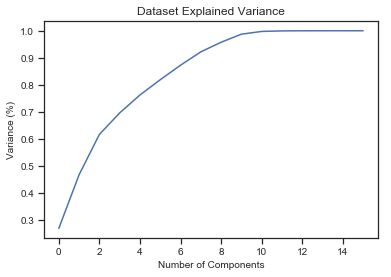

In [83]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance') #Lihn, please change it, our dataset is not Pulsar :D
plt.show()

In [41]:
# the cummulative PCA is not chaning after 10th components, which means that we have 4 components that's not helping

# data points => finding covariance => how much shit is correlated => eigenvector => 
# route the row => 3 components
# one big blue and red
# => can draw a line
# => 

In [89]:
reg2 = LinearRegression() 
# Create the PCA object and fit
pca2 = PCA(n_components = 12)
scaler = StandardScaler().fit(X_train)
# transform long feature vectors (length D) to short ones (length n)
X_train_pca2 = pca2.fit_transform(data_rescaled)

reg_train2 = reg2.fit(X_train_pca2, labels.U_mu)

labels_pca_pred2 = reg_train2.predict(X_train_pca2)   


y_pred_val = reg_train2.predict(pca2.transform(scaler.transform(X_test)))   

err_train2 = mean_squared_error(labels.U_mu, labels_pca_pred2)  # compute training error
err_val2 = mean_squared_error(labels_test.U_mu, y_pred_val)
print("training error with 12 components using all 16 _mu component", err_train2)
print("testing error with 10 components using all 16 _mu component", err_val2)

pd.DataFrame({'Actual': labels.U_mu,  'Linear Predicted': labels_pca_pred2.flatten(), 'Linear Predicted no PCA': labels_pred.flatten()}).head()

training error with 12 components using all 16 _mu component 4.274230914633812
testing error with 10 components using all 16 _mu component 4.266165195530136


,Actual,Linear Predicted,Linear Predicted no PCA
datetime,,,
2006-09-20,88.625,89.543003,89.556014
2006-09-21,82.000,84.374928,82.686893
2006-09-22,86.000,87.742861,86.881184
2006-09-23,91.000,89.370132,90.809713
2006-09-24,89.000,89.926771,89.860755


In [43]:
reg = LinearRegression() 
# Create the PCA object and fit
pca1 = PCA(n_components = 5)

# transform long feature vectors (length D) to short ones (length n)
X_train_pca = pca1.fit_transform(X_train.iloc[:,1:8])

reg_train = reg.fit(X_train_pca, labels.U_mu)

labels_pca_pred = reg_train.predict(X_train_pca)   
# y_pred_val = reg_train.predict(X_val[:,:n])   

err_train = mean_squared_error(labels.U_mu, labels_pca_pred)  # compute training error 
print("training error with 5 components using 8 _mu component only", err_train)

training error with 5 components using 8 _mu component only 6.596246438661906


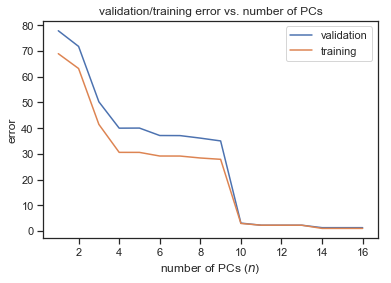

In [44]:
D = 16
err_val = np.zeros(D)  
err_train = np.zeros(D)

reg = LinearRegression() 

for n in range(1,D+1,1):
    
    # Create the PCA object and fit
    pca = PCA(n_components = n)
    pca.fit(pd.concat([X_train, X_test]))
    
    # transform long feature vectors (length D) to short ones (length n)
    X_train_pca = pca.transform(X_train)
    X_test_pca   = pca.transform(X_test)

    reg_train = reg.fit(X_train_pca, labels) 

    labels_pred_train = reg_train.predict(X_train_pca)   
    labels_pred_val = reg_train.predict(X_test_pca)   
    
    err_train[n-1] = mean_squared_error(labels, labels_pred_train)
    err_val[n-1] = mean_squared_error(labels_test, labels_pred_val)
plt.plot([n for n in range(1,D+1,1)],err_val,label="validation")
plt.plot([n for n in range(1,D+1,1)],err_train,label="training")
plt.xlabel('number of PCs ($n$)')
plt.ylabel(r'error')
plt.legend()
plt.title('validation/training error vs. number of PCs')
plt.show()
print()

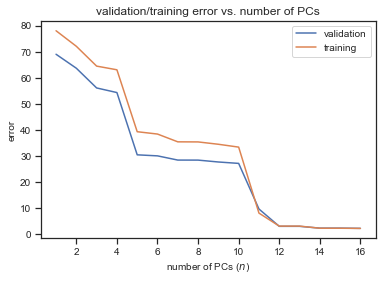

3.093071826984728
3.18045928167933


In [93]:
D = 16
poly_err_val = np.zeros(D)  
poly_err_train = np.zeros(D)

polynomial_features= PolynomialFeatures(degree=2)
poly_X_train = polynomial_features.fit_transform(X_train)
poly_X_test = polynomial_features.fit_transform(X_test)
reg = LinearRegression() 

for n in range(1,D+1,1):
    
    # Create the PCA object and fit
    pca = PCA(n_components = n)
    pca.fit(pd.concat([pd.DataFrame(poly_X_train), pd.DataFrame(poly_X_test)]))
    
    # transform long feature vectors (length D) to short ones (length n)
    poly_X_train_pca = pca.transform(poly_X_train)
    poly_X_test_pca   = pca.transform(poly_X_test)

    reg_train = reg.fit(poly_X_train_pca, labels) 
#     reg_val = reg.fit(poly_X_test_pca, labels_test)
    poly_labels_pred_train = reg_train.predict(poly_X_train_pca)   
    poly_labels_pred_val = reg_train.predict(poly_X_test_pca)   
    
    poly_err_train[n-1] = mean_squared_error(labels, poly_labels_pred_train)
    poly_err_val[n-1] = mean_squared_error(labels_test, poly_labels_pred_val)
plt.plot([n for n in range(1,D+1,1)],poly_err_train,label="validation")
plt.plot([n for n in range(1,D+1,1)],poly_err_val,label="training")
plt.xlabel('number of PCs ($n$)')
plt.ylabel(r'error')
plt.legend()
plt.title('validation/training error vs. number of PCs')
plt.show()
print(poly_err_train[11])
print(poly_err_val[11])

In [46]:
# ANTON DID THESE

In [47]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# This function is used to plot the confusion matrix and normalized confusion matrix
################################################
"""
    Function visualizes a confusion matrix with and without normalization
"""
def plot_confusion_matrix(cm):
    
    plt.rc('legend', fontsize=10) 
    plt.rc('axes', labelsize=10) 
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 

    fig, axes = plt.subplots(1, 2,figsize=(12.5,6.25))

    im1 = axes[0].imshow(cm, interpolation='nearest') #cmap=plt.cm.Blues
    fig.colorbar(im1, ax=axes[0])
    classes = ['Dry','Not Dry']
    tick_marks = np.arange(len(classes))
    axes[0].set_xticks(tick_marks)
    axes[0].set_xticklabels(classes,rotation=45)
    axes[0].set_yticks(tick_marks)
    axes[0].set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes[0].text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    axes[0].set_xlabel('predicted label $\hat{y}$')
    axes[0].set_ylabel('true label $y$')
    axes[0].set_title(r'$\bf{Figure\ 6.}$Without normalization')
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im2 = axes[1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    fig.colorbar(im2, ax=axes[1])
    
    axes[1].set_xticks(tick_marks)
    axes[1].set_xticklabels(classes,rotation=45)
    axes[1].set_yticks(tick_marks)
    axes[1].set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes[1].text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                verticalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    axes[1].set_xlabel('predicted label $\hat{y}$')
    axes[1].set_ylabel('true label $y$')
    axes[1].set_title(r'$\bf{Figure\ 7.}$Normalized')
    
    axes[0].set_ylim(-0.5,1.5) 
    axes[1].set_ylim(-0.5,1.5)
    plt.tight_layout()
    plt.show()

In [48]:
def optimize_neighbors(X_trn, y_trn): 
    """
    Finds the optimal minimum number of neighbors to use for the KNN classifier
    with K-fold cross validation.
    :vizualize_error_rate: bool, when True shows the plot of number of neighbors vs error
            Default: true
    :return: the number of neighbors (int)
    """
    neighbors = list(range(1, 50, 2))

    #transform to missclas_error
    error_measurements = []

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(knn, X_trn, y_trn, cv=20, scoring='accuracy')
        error_measurements.append(scores.mean())
    mis_clas_error = [1 - e for e in error_measurements]
    #print(error_measurements)
    
    #pick up the smallest number
    best_k = neighbors[mis_clas_error.index(min(mis_clas_error))]
    print("The optimal number of neighbors is {}".format(best_k))

    # plot misclassification error vs k
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.plot(neighbors, mis_clas_error)
    plt.xlabel("Number of Neighbors K")
    plt.ylabel("Misclassification Error")
    plt.xticks(np.arange(0, 55, 5))
    #plt.axvspan(6, 10, color='red', alpha=0.5)
    ax.grid(color='black', linestyle='-', linewidth=0.3, alpha=1)
    plt.show()
    return best_k

(3140, 16) (3140,)
The optimal number of neighbors is 15


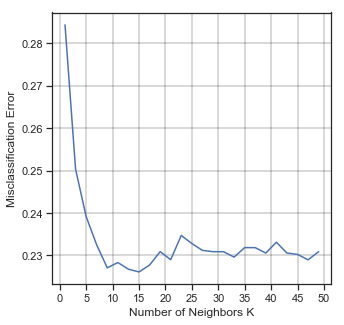

15
0.7919762258543833
accuracy: 0.7919762258543833
[[309 119]
 [161 757]]


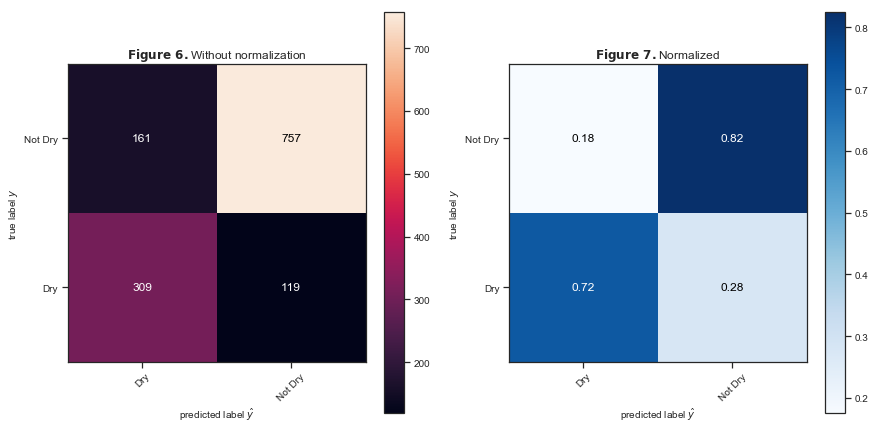

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       428
           1       0.86      0.82      0.84       918

   micro avg       0.79      0.79      0.79      1346
   macro avg       0.76      0.77      0.77      1346
weighted avg       0.80      0.79      0.79      1346



In [49]:
#Classification with Knn
X_trn = training_data[['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 
                       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']]
y_trn = np.array(labels.OBSERVED)
X_tst = testing_data[['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 
                       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']]
y_test = np.array(labels_test.OBSERVED)

print(X_trn.shape, y_trn.shape)

n = optimize_neighbors(X_trn, y_trn)
print(n)
knn_classifier = KNeighborsClassifier(n_neighbors = n)
knn_classifier.fit(X_trn, y_trn)
y_pred = knn_classifier.predict(X_tst)
print(knn_classifier.score(X_tst, y_test))
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
print(cm)
#cm = confusion_matrix(y_test, y_pred, labels.OBSERVED)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))



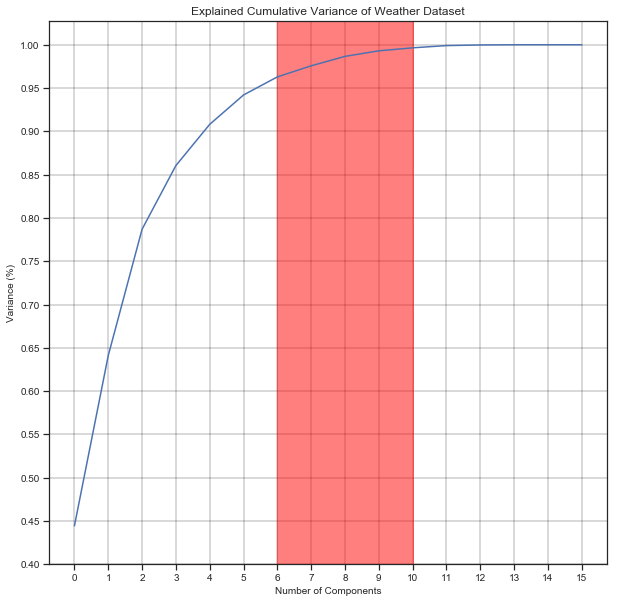

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Compute the optimal amount of components for principal component analysis. 
#Optimal value of components takes from 95%-100% of cumulative explained variance

X_trn = training_data[['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 
                       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']]
y_trn = np.array(labels.OBSERVED)
X_tst = testing_data[['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 
                       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']]
y_test = np.array(labels_test.OBSERVED)

#dataset = pd.merge(X_trn.reset_index(), X_tst.reset_index(),how='inner', 
#                        on=None, left_on=None, right_on=None).drop_duplicates().set_index(['datetime'])
#print(dataset)
#HOW TO MERGE X_TEST AND X_TRAIN INTO ONE DATASET
scaler = MinMaxScaler(feature_range=[0, 1])
normed_train_data = scaler.fit_transform(X_trn)
normed_test_data = scaler.fit_transform(X_tst)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normed_train_data)#Plotting the Cumulative Summation of the Explained Variance
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.yticks(np.arange(0.4, 1.05, 0.05))
plt.xticks(np.arange(0, 16, 1))
plt.title('Explained Cumulative Variance of Weather Dataset')
plt.axvspan(6, 10, color='red', alpha=0.5)
ax.grid(color='black', linestyle='-', linewidth=0.3, alpha=1)
plt.show()

The optimal number of neighbors is 47


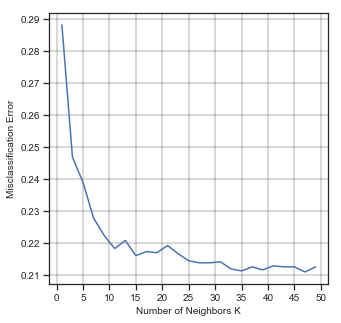

47
0.7771173848439822
accuracy: 0.7771173848439822
[[282 146]
 [154 764]]


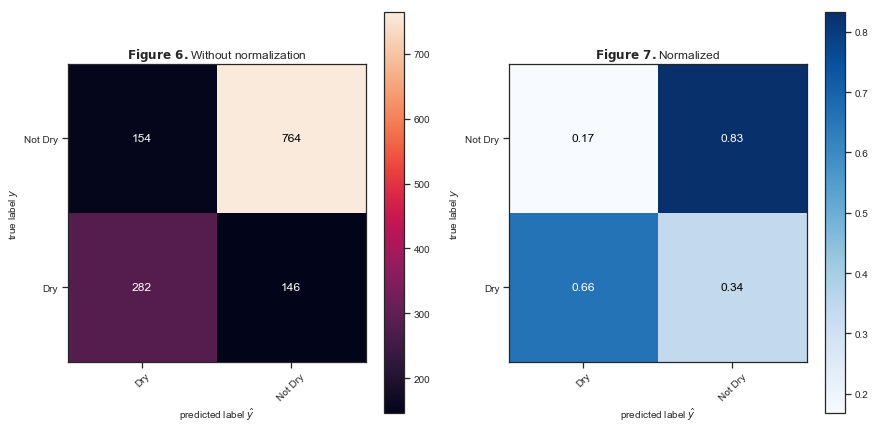

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       428
           1       0.84      0.83      0.84       918

   micro avg       0.78      0.78      0.78      1346
   macro avg       0.74      0.75      0.74      1346
weighted avg       0.78      0.78      0.78      1346



In [51]:
#from the plot above clearly seen that 9 components are taking 98%-99% of variance
pca = PCA(n_components = 9)
X_trn_reduced = pca.fit_transform(normed_train_data)
X_tst_reduced = pca.fit_transform(normed_test_data) #this is bad, change it

#now find optimal number of neigbors
n = optimize_neighbors(X_trn_reduced, y_trn)
print(n)

#train the knn classifier with reduced PCA
knn_classifier = KNeighborsClassifier(n_neighbors = n)
knn_classifier.fit(X_trn_reduced, y_trn)
y_pred = knn_classifier.predict(X_tst_reduced)
print(knn_classifier.score(X_tst_reduced, y_test))
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
print(cm)
#cm = confusion_matrix(y_test, y_pred, labels.OBSERVED)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))


Accuracy of logistic regression classifier on test set: 0.77
[[280 148]
 [165 753]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


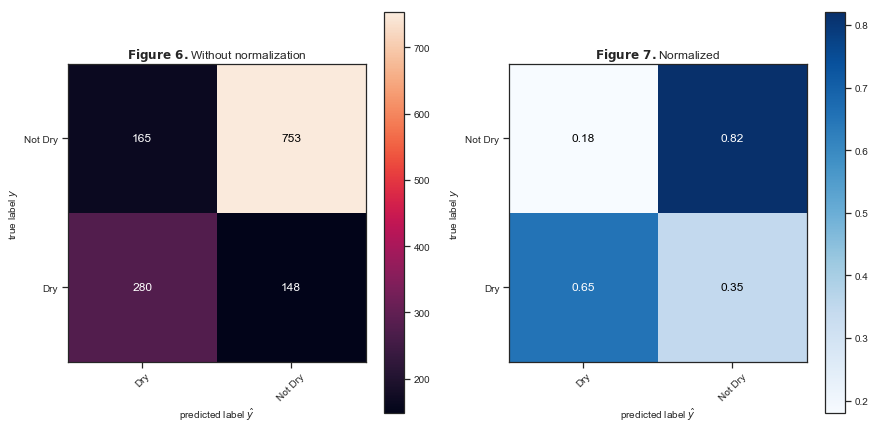

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       428
           1       0.84      0.82      0.83       918

   micro avg       0.77      0.77      0.77      1346
   macro avg       0.73      0.74      0.73      1346
weighted avg       0.77      0.77      0.77      1346



In [52]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_trn = training_data[['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 
                       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']]
y_trn = np.array(labels.OBSERVED)
X_tst = testing_data[['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 
                       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']]
y_test = np.array(labels_test.OBSERVED)


logReg = LogisticRegression(random_state=0,C=1e6)
logReg_fit = logReg.fit(X_trn, y_trn)
y_pred = logReg_fit.predict(X_test).reshape(-1, 1)
# print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logReg_fit.score(X_trn, y_trn)))

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg_fit.score(X_tst, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix)
print(classification_report(y_test, y_pred))


In [53]:
# using pca should help with the logistic regression


In [54]:
pca2 = PCA(n_components = 10)
scaler = StandardScaler()
scaler.fit(X_train.values)

test_data_rescaled = scaler.transform(X_test.values)

X_train_pca2 = pca2.fit_transform(scaler.transform(X_train.values))
X_test_pca2 = pca2.transform(test_data_rescaled)

pca_logReg_fit = logReg.fit(X_train_pca2, labels.OBSERVED)

y_pred_log = logReg_fit.predict(X_test_pca2).reshape(-1, 1)
print('Accuracy on train set: {:.2f}'.format(pca_logReg_fit.score(X_train_pca2, y_trn)))
print('Accuracy on test set: {:.2f}'.format(pca_logReg_fit.score(X_test_pca2, y_test)))






Accuracy on train set: 0.80
Accuracy on test set: 0.79


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
# => applying PCAs on 10 components gives 2% improvement on the test set result